# Visualizacion de Datos
# Alejandro Torre A00828064

Empece importando las librerias que tengo que utilizar para el desarrollo de mi reto

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Quise confirmar que mi base de datos que importe estaba en el mismo path que estaba trabajando.

In [2]:
%ls

 07_02_pie_box_scatter_bubble.ipynb   requirements.txt
 Canada.xlsx                         'Reto Entregable 1.ipynb'
 datasets/                           'Reto Entregable 1.ipynb copy'
 heart.csv                           'RETO NUEVO.ipynb'
 movie_metadata.csv                   runtime.txt
 nhanes_2015_2016.csv                 session_01/
 README.md                            welcome_binder.ipynb
 requierementsEXL


Para poder abrir la base de datos tengo que utilizar panda para abrirlo dentro de un dataframe

In [3]:
df = pd.read_csv("heart.csv")

Ya al asignar que tu dataframe sea tu base de datos abri el dataframe que me muestra los datos

# 1. ¿Cuál es la variable de interés a pronosticar?, ¿Qué se espera lograr con este proyecto?

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Note que en mi dataframe habian columnas que no influyen el analisis que voy a realizar por ende lo borre

In [5]:
df = pd.read_csv("heart.csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


La variable de interes de mi base de datos es "HearDisease" lo cual el valor numerico de 1 o 0 indica si padecen de una enfermedad del corazon. Esta base de datos agarro a 918 personas buscando identificar la causa de un ataque o una enfermedad relacionada con el corazon. Mi proposito con esta base de datos es descubrir la importancia de las variables "Cholesterol", "Sex", "Age", "Resting BP" y "ExerciseAngina" y como cada una impacta "HeartDisease".

# 2. ¿Cuántas variables hay y de qué tipos son?, ¿Por qué esimportante conocer esta información?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Esta funcion nos permite identificar el tipo de dato de cada columna presente en la base de datos. Esto es importante considerando que voy a buscar una relacion y generar graficas de esta base de datos. El proposito es identificar si la variable es numerica y de que tipo.

# 3 ¿Qué distribución sigue la variable de interés ('Age y Oldpeak')?

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Esta funcion me describe la media, la desviacion estandar, el valor minimo y maximo entre otras cosas. Me permite ubicar mejor como se comportan los datos que voy a estar utilizando y que variables voy a poder utilizar.  

Text(0.5, 1.0, 'HeartDisease')

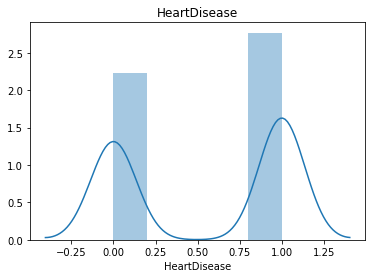

In [8]:
sns.distplot(df.HeartDisease)
plt.title('HeartDisease')

Text(0.5, 1.0, 'Edad')

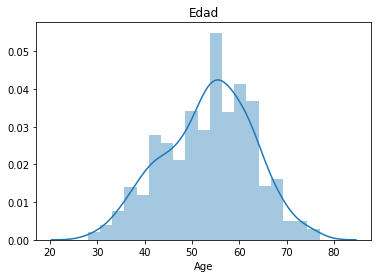

In [9]:
sns.distplot(df.Age)
plt.title('Edad')

Utilize un histograma para observar las edades del grupo de personas que tomaron en cuenta para esta base de datos ya que definitivamente la edad juega un rol en las enfermedades del corazon. Es mas comun que a una edad mas grande padescan de esta enfermedad a que una edad temprana. 

Text(0.5, 1.0, 'Oldpeak')

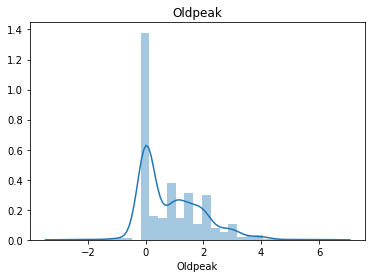

In [10]:
sns.distplot(df.Oldpeak)
plt.title('Oldpeak')

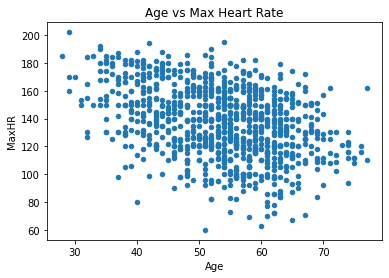

In [11]:
df.plot(kind="scatter",
x="Age",
y="MaxHR")
plt.title('Age vs Max Heart Rate') 
plt.show()

Usando una grafica de dispersion queria comparar la edad de las persona con la maxima velocidad del latido del corazon y la relacion con la enfermedad del corazon.

# 4 ¿Que genero es mas vulnerable a enfermedades del corazon?

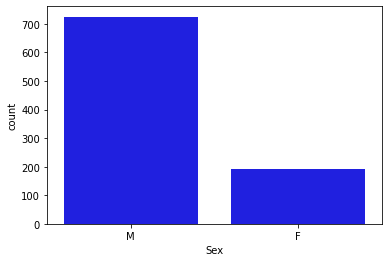

In [12]:
sns.countplot(x='Sex', 
              color='blue',
              data = df
             )
plt.show()

Aqui con esta grafica puedo identificar que claramente los hombres son mas vulnerables y mas probables de padecer de una enfermedad del corazon.

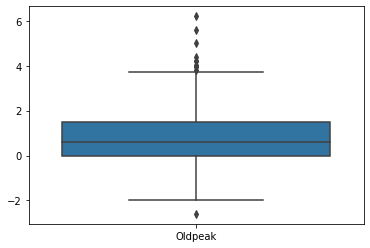

In [13]:
sns.boxplot(data = df.loc[:,['Oldpeak']])
plt.show()

Con esta grafica me doy cuenta que la variable de cholesterol no cuenta con datos atipicos.

In [14]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


Identifico que las variables de comparacion son Oldpeak con HeartDisease como la variable independiente.

# 5 ¿Qué tan bueno es el análisis de regresión para 'Oldpeak'en función de 'HeartDisease'?

In [15]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [16]:
import statsmodels.api as sm
model = sm.OLS.from_formula('HeartDisease~Oldpeak',
                            data=df)
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     178.6
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           2.39e-37
Time:                        12:57:19   Log-Likelihood:                -579.25
No. Observations:                 918   AIC:                             1162.
Df Residuals:                     916   BIC:                             1172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3862      0.020     19.754      0.000       0.348       0.425
Oldpeak        0.1884      0.014     13.365      0.000       0.161       0.216
==============================================================================
Omnibus:                    10984.554   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.738
Skew:                          -0.020   Prob(JB):                     2.17e-17
Kurtosis:                       1.584   Cond. No.                         2.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Con un valor de R cuadrado muy bajo no me va arrojar una grafica de la forma que me la espero pero con un valor de 1.728 de Durbin-Watson podemos inferir que es una relacion buena. 

# 6. ¿Cómo se vería nuevamente la gráfica de dispersiónde las observaciones cs la gráfica de regresiónpropuesta por el modelo?,

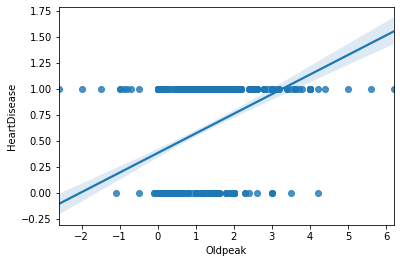

In [17]:
rpr = sns.regplot(x = 'Oldpeak',
                  y = 'HeartDisease',
                  data = df,
                 )

Conclusion: 
En conclusion con todo lo aprendido en el bloque, se obtuvieron diferentes herramientas y conocimientos que nos podran ayudar en un futuro en la vida laboral y como se podra aplicar en empresas funcionales. En cuanto a esta base de datos al terminar de crear diferentes tipos de graficas y diagramas esta base de datos tiene mucho potencial para poder sacar conclusiones y nuevas ideas para identificar una enfermedad en el corazon o el riesgo de enfermedad del corazon. En este caso no vemos una regresion confiable para predecir la enfermedad de corazon ya que la grafica de regresion no se ve una correlacion muy fuerte.

